Importamos librerias necesarias 

In [2]:
import tensorflow as tf
import numpy as np

Declaramos arreglos de numeros con nuestras entradas en Grados Celsius y sus salidas en grados fahrenheith

Estos seran los arreglos que la red utilizará para aprender

In [3]:
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46.4, 59, 71.6, 100.4], dtype=float)

Comenzaremos a diseñar nuestro modelo de red neuronal
* Con keras podemos especificar las dos capas de entrada y salida por separado, pero para ahorrar un paso, especificaremos solo la capa de salida
* Creamos una variable llamada capa y la iniciamos como una capa de tipo densa en keras, e indicamos sus unidades
* Luego utilizamos el modelo secuencial

In [4]:
capa = tf.keras.layers.Dense(units=1, input_shape = [1])
modelo = tf.keras.Sequential([capa])

* Indicaremos solo dos propiedades: el optimizador y la función de pérdida 
* Para el optimizador usaremos uno llamado Adam algoritmo que en resumen le permite a la red saber cómo ajustar los pesos y sesgos de manera eficiente para que aprenda y no desaprenda
* Para la función de pérdida usaremos uno llamado 'mean_squared_error', básicamente esta función considera que una poca cantidad de errores grandes es peor que una gran cantidad de errores pequeños 

In [5]:
modelo.compile(
    optimizer = tf.keras.optimizers.Adam(0.1),
    loss ='mean_squared_error'
)

Ahora entrenamos nuestro modelo

In [6]:
historial = modelo.fit(celsius, fahrenheit, epochs=1000, verbose=False)

Veremos el resultado de la funcion de perdida antes de intentar predecir

Este grafico nos dice qué tan mal están los resultados de la red en cada vuelta que dio

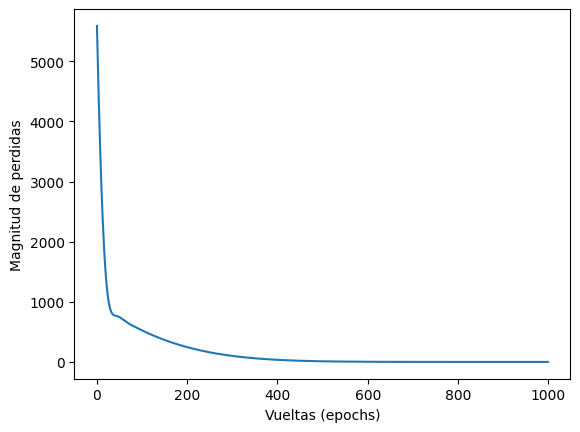

In [7]:
import matplotlib.pyplot as plt
plt.xlabel('Vueltas (epochs)')
plt.ylabel('Magnitud de perdidas')
plt.plot(historial.history['loss'])

Podemos comprobar con el grafico que con 500 vueltas ya era suficiente ya que las perdidas no bajan mas a partir de ahí

Llegó el momento de hacer una predicción

In [10]:
def celsius_a_fahrenheit(celsius_prediccion):
    resultado = modelo.predict([celsius_prediccion])[0][0]
    return print(str(celsius_prediccion), ' grados Celsius equivalen a ', resultado, ' grados Fahrenheit')


In [11]:
celsius_a_fahrenheit(100)

1/1 [==============================] - 0s 47ms/step
100  grados Celsius equivalen a  211.9942  grados Fahrenheit
